### Линейная полиномиальная регрессия [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [1]:
import pandas as pd

def load_data(filename=None):
    #Начало вашего кода
    return pd.read_csv(filename)

    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1334,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1335,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1336,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

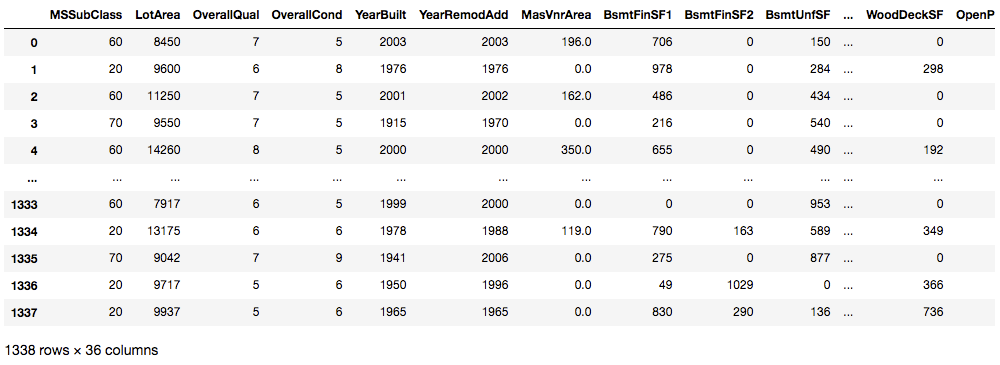

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [2]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indeces = np.arange(0,len(data))
    np.random.shuffle(indeces)
    val_ind = indeces[: round(ratio * len(indeces))]
    train_ind = indeces[round(ratio * len(indeces)):]
    val_data = data.loc[val_ind]
    train_data = data.loc[train_ind]
    #Конец вашего кода
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [3]:
splitted_data["validation"].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,610,20,7943,4,5,1961,1961,192.0,903,0,...,64,0,39,0,0,0,0,4,2007,118500
1087,1189,60,8935,7,5,2002,2002,95.0,0,0,...,144,68,0,0,0,0,0,7,2009,195000
1020,1116,20,12085,8,5,2007,2007,328.0,1004,0,...,0,0,0,0,0,0,0,11,2007,318000
460,502,60,9803,7,5,2005,2005,0.0,400,0,...,0,108,0,0,0,0,0,2,2008,226700
802,873,20,8892,5,7,1953,1996,0.0,0,0,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

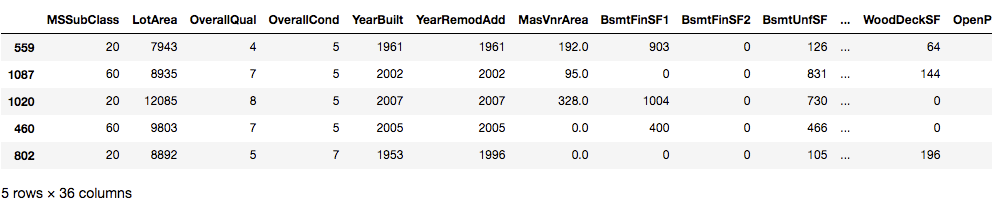

In [4]:
splitted_data["train"].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,390,60,12474,10,5,2007,2008,272.0,1280,0,...,196,134,0,0,0,0,0,8,2008,426000
1316,1436,20,8400,6,9,1962,2005,237.0,0,0,...,0,36,0,0,0,0,0,7,2008,174000
133,147,30,6120,5,7,1931,1993,0.0,209,0,...,48,0,0,0,0,0,0,11,2009,105000
181,202,20,10125,6,6,1977,1977,0.0,641,279,...,238,83,0,0,0,0,0,2,2008,171500
1133,1240,20,9037,8,5,2006,2006,32.0,428,0,...,120,33,0,0,0,0,0,12,2007,265900


### Ожидаемые результаты:

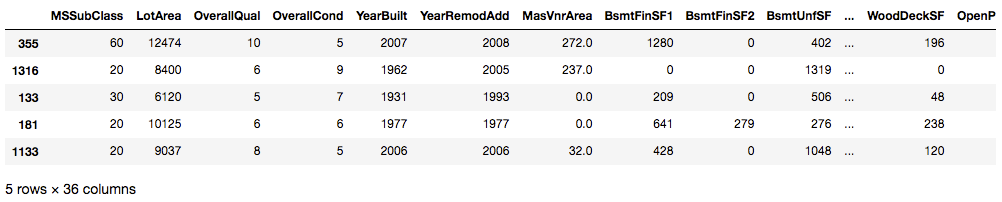

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

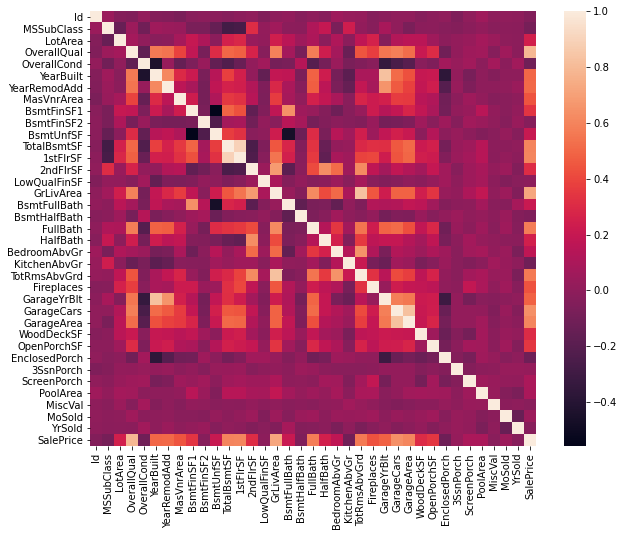

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода 
plt.figure(figsize=(10,8))
sns.heatmap(splitted_data["train"].corr());
#Конец вашего кода

### Ожидаемые результаты:

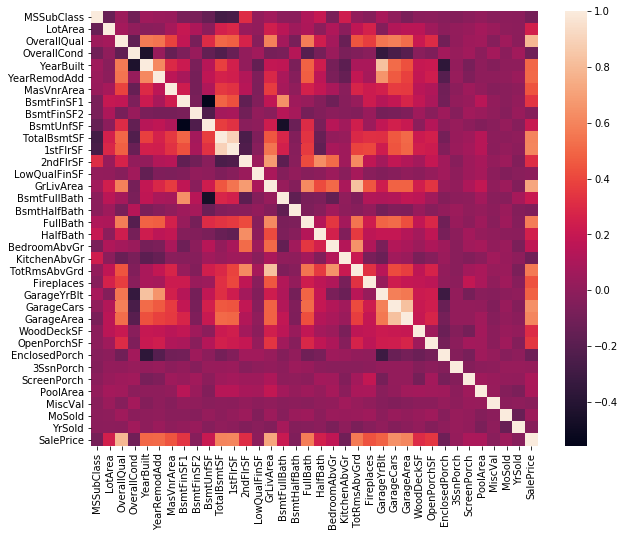

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

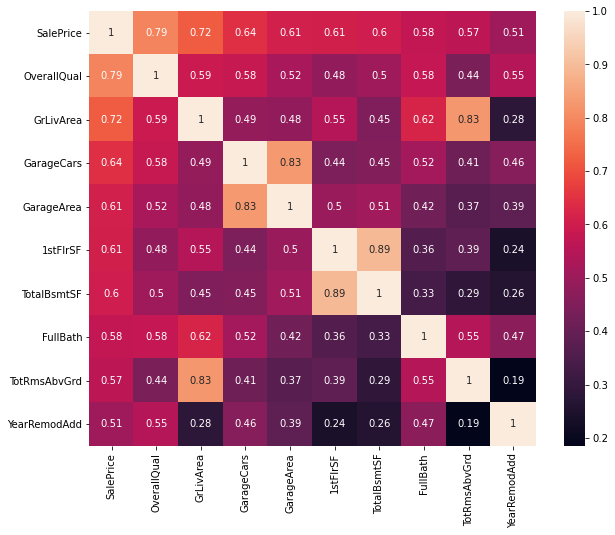

In [6]:
#Начало вашего кода 
plt.figure(figsize=(10,8))
most_corr = splitted_data["train"].corr()['SalePrice'].sort_values(ascending = False)[0:10].index
important = most_corr[1:]
sns.heatmap(splitted_data["train"][most_corr].corr(), annot = True);
#Конец вашего кода


### Ожидаемые результаты:


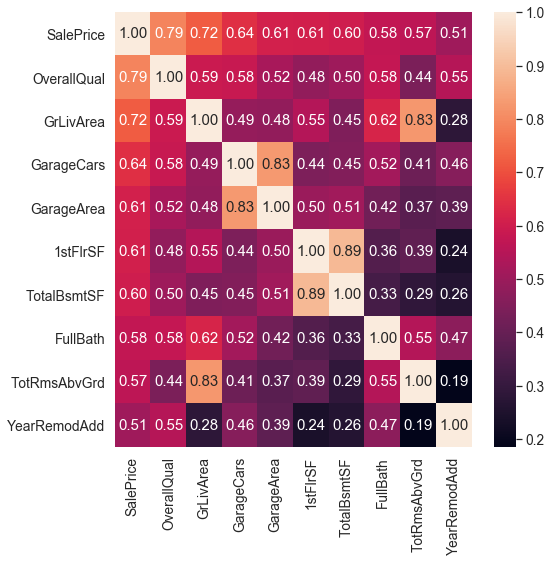

5. Теперь пришло время использовать модель линейной **полиномиальной** регрессии для параметров в списке ```important``` для прогнозирования ```SalePrice```. Пожалуйста, реализуйте функцию ```train_lin_poly_regressors(data, parameters, target="SalePrice", degree=1)```, которая будет обучать модель линейной **полиномиальной** регрессии в степени ```degree``` для ```n``` параметров из списка ```parameters```. Функция должна возвращать обученные модели линейной **полиномиальной** регрессии для каждого элемента списка ```parameters```.

In [7]:
#Начало вашего кода 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
def train_lin_poly_regressors(data, parameters, target="SalePrice", degree=1):
    lin_poly_regressors = {}
    for i in parameters:
        feature_generator = PolynomialFeatures(degree = degree)
        pol_features = feature_generator.fit_transform(data[i].values.reshape(-1,1), ) 
        pol_regressor = LinearRegression()
        pol_regressor.fit(pol_features, data[target].values.reshape(-1,1) ) # degree нужно будет для валидации
        lin_poly_regressors[i] = [pol_regressor, degree]
    return lin_poly_regressors
#Конец вашего кода

lin_poly_regressors = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice")
print(lin_poly_regressors)

{'OverallQual': [LinearRegression(), 1], 'GrLivArea': [LinearRegression(), 1], 'GarageCars': [LinearRegression(), 1], 'GarageArea': [LinearRegression(), 1], '1stFlrSF': [LinearRegression(), 1], 'TotalBsmtSF': [LinearRegression(), 1], 'FullBath': [LinearRegression(), 1], 'TotRmsAbvGrd': [LinearRegression(), 1], 'YearRemodAdd': [LinearRegression(), 1]}


6. Спрогнозируйте ```"SalePrice"``` для набора данных ```validation``` с использованием обученной модели множественной линейной регрессии. Пожалуйста, реализуйте функцию ```validation(regressors, data, target="SalePrice")```, которая будет принимать обученную модель множественной линейной регрессии ```regressor```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать ```DataFrame``` с первым столбцом, который будет истинным ```"SalePrice"```,  а второй столбцец предсказан моделью множественной линейной регрессии.

In [8]:
#Начало вашего кода
def validation(regressors, data, target="SalePrice"):
    res = pd.DataFrame()
    res[target] = data[target]
    for i in regressors:
        feature_generator = PolynomialFeatures(degree = regressors[i][1]) 
        pol_features = feature_generator.fit_transform(data[i].values.reshape(-1,1), )
        res[i] =    regressors[i][0].predict(pol_features)
    return res
#Конец вашего кода

pd_predictions = validation(lin_poly_regressors, splitted_data["validation"], target="SalePrice")
pd_predictions

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearRemodAdd
559,118500,83821.585488,132134.892580,118586.814906,126416.260241,169358.427220,179541.739582,140140.937402,144114.362610,138699.169483
1087,195000,223356.446597,201020.631361,197540.052635,184831.983133,145005.381659,156551.359507,222671.602189,200261.257202,218807.817430
1020,318000,269868.066967,209099.149063,276493.290364,294361.463555,256070.028838,261401.426214,222671.602189,200261.257202,228577.164740
460,226700,223356.446597,212810.900439,197540.052635,212529.093124,149310.212945,160615.315581,222671.602189,200261.257202,224669.425816
802,116000,130333.205858,119143.762763,197540.052635,164940.422320,154722.000848,72253.299231,140140.937402,144114.362610,207084.600657
...,...,...,...,...,...,...,...,...,...,...
120,150750,130333.205858,164667.301703,197540.052635,217816.723214,206010.990741,183489.582625,140140.937402,200261.257202,218807.817430
759,189000,223356.446597,176348.401623,197540.052635,193392.908039,219171.474958,228889.777622,222671.602189,172187.809906,216853.947968
248,139000,176844.826228,197963.894933,118586.814906,145804.237235,243524.520519,204041.589056,222671.602189,172187.809906,191453.644960
991,187500,176844.826228,183335.227744,197540.052635,163681.462775,127786.056516,140295.535211,222671.602189,172187.809906,207084.600657


### Ожидаемые результаты:

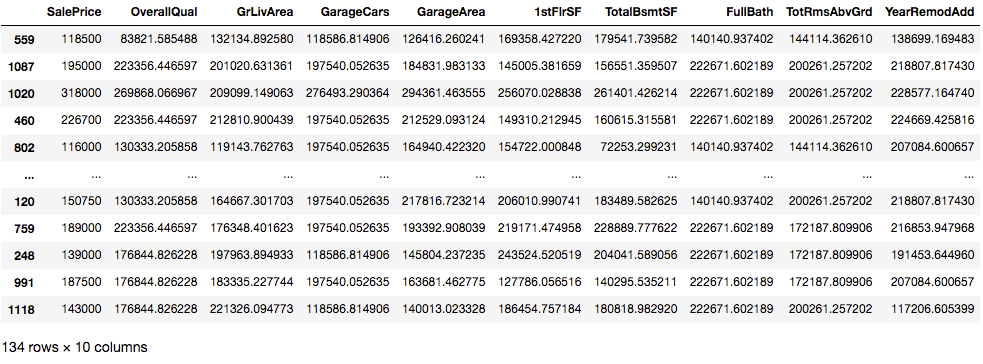

8. Постройте графики 3х3, где ось X - это истинные значения ```"SalePrice"```, а ось Y - ваши прогнозы.

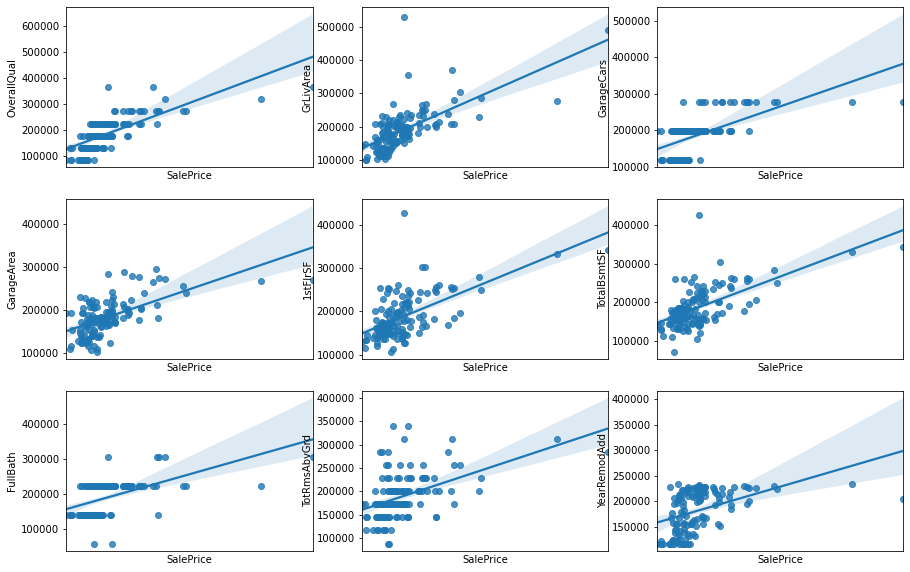

In [9]:
#Начало вашего кода 
def plot_comparison(data): 
    plt.figure(figsize = (15,10))
    for num, val in enumerate(important, 1):
        plt.subplot(3,3,num)
        sns.regplot(x = 'SalePrice', y = val, data= data)
        plt.xticks([])
#Конец вашего кода

plot_comparison(pd_predictions)

### Ожидаемые результаты:

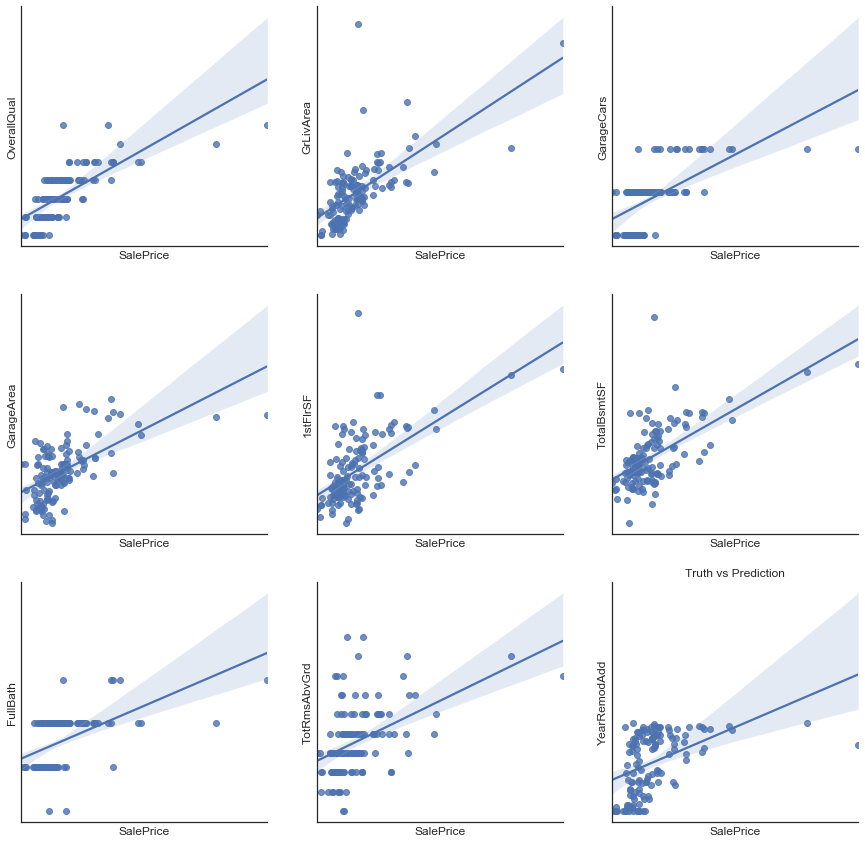

9. В задаче 5 мы обучили модели линейной полиномиальной регрессии степени 1 (то же самое что и простая линейная регрессия) для 9 самых коррелированных столбцов с «SalePrice». Теперь давайте попробуем степени по выше, такие как степени 2, 3, и 10.

линейная полиномиальная регрессия степени 2


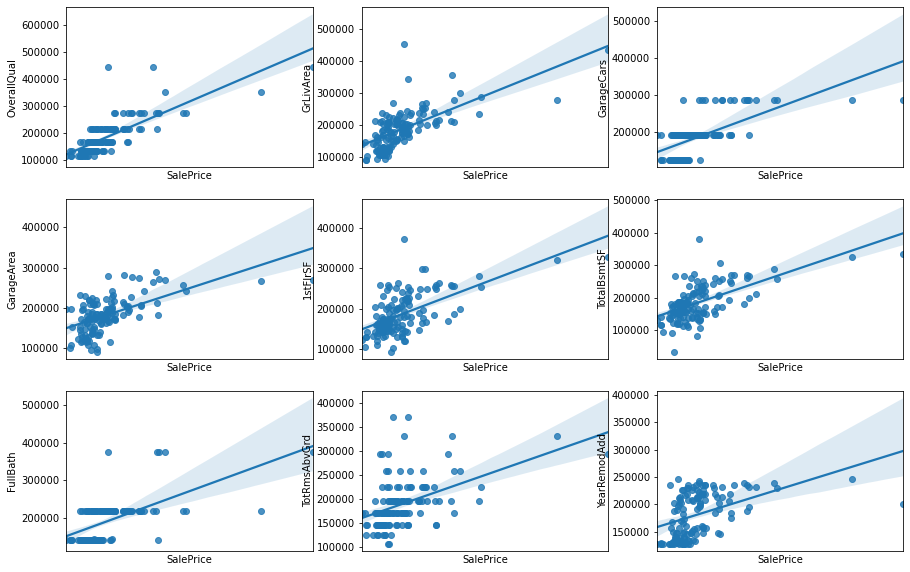

In [10]:
print("линейная полиномиальная регрессия степени 2")
#Начало вашего кода
lin_poly_regressors = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice", degree =2)
pd_predictions2 = validation(lin_poly_regressors, splitted_data["validation"], target="SalePrice")
plot_comparison(pd_predictions2)
#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 2
```

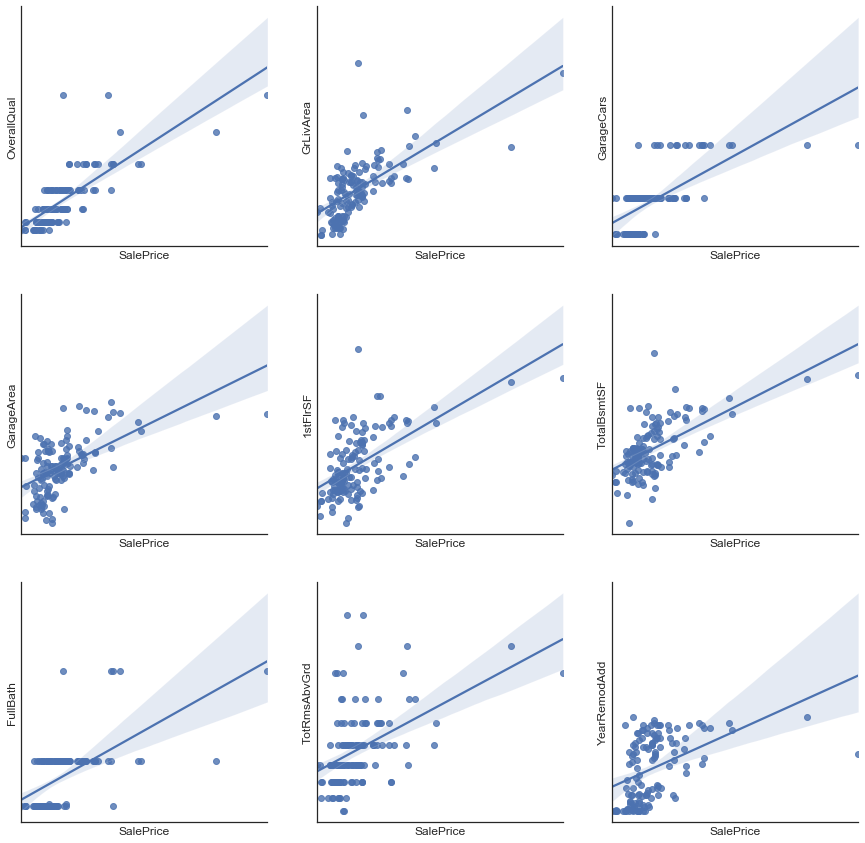


линейная полиномиальная регрессия степени 3


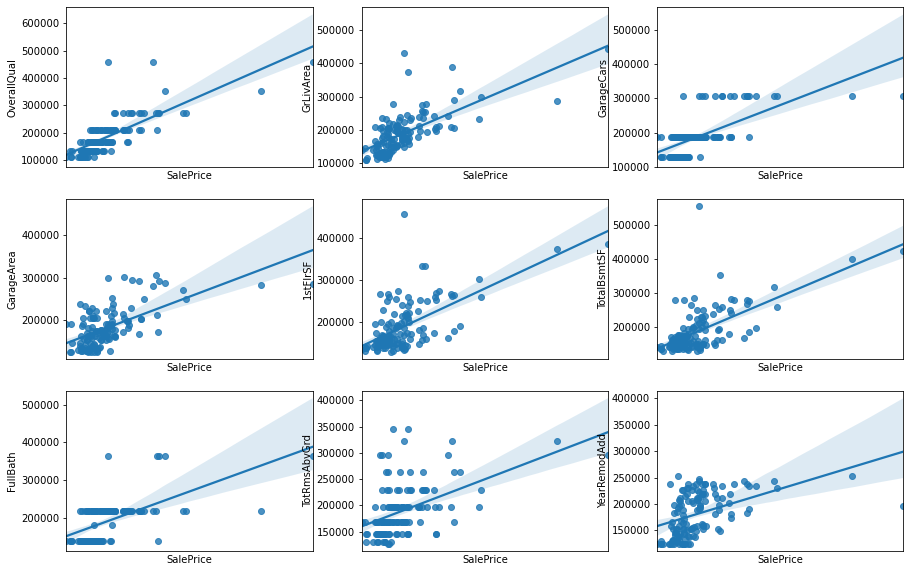

In [11]:
print("линейная полиномиальная регрессия степени 3")
#Начало вашего кода
lin_poly_regressors = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice", degree =3)
pd_predictions3 = validation(lin_poly_regressors, splitted_data["validation"], target="SalePrice")
plot_comparison(pd_predictions3)
#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 3
```

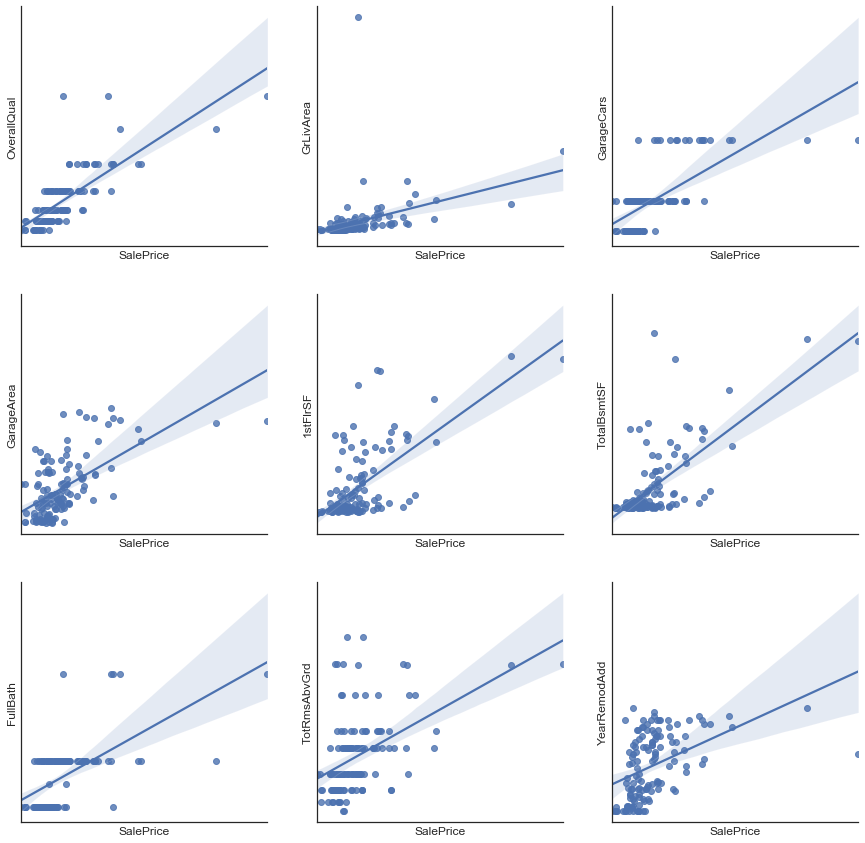


линейная полиномиальная регрессия степени 10


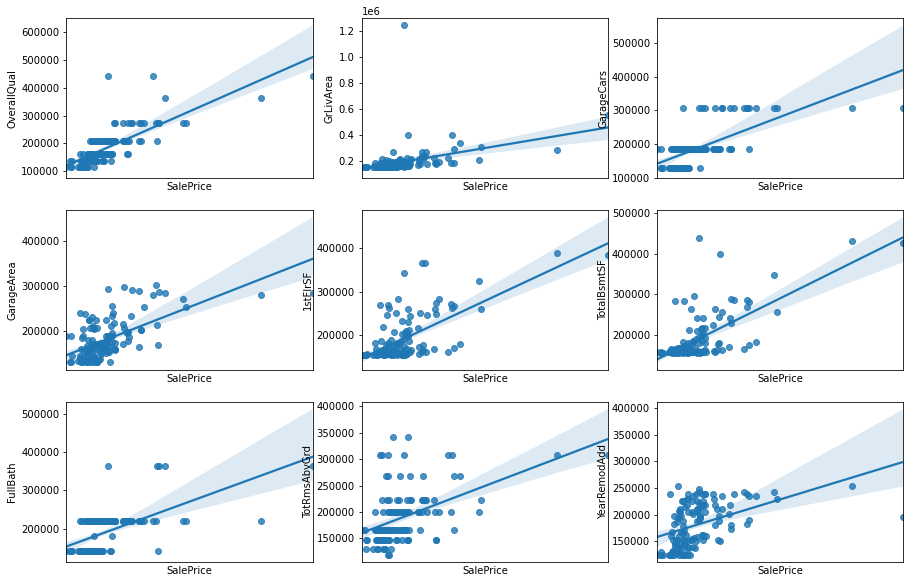

In [12]:
print("линейная полиномиальная регрессия степени 10")
#Начало вашего кода
lin_poly_regressors = train_lin_poly_regressors(splitted_data["train"], important, target="SalePrice", degree =10)
pd_predictions10 = validation(lin_poly_regressors, splitted_data["validation"], target="SalePrice")
plot_comparison(pd_predictions10)
#Конец вашего кода

### Ожидаемые результаты:
```
линейная полиномиальная регрессия степени 2
```

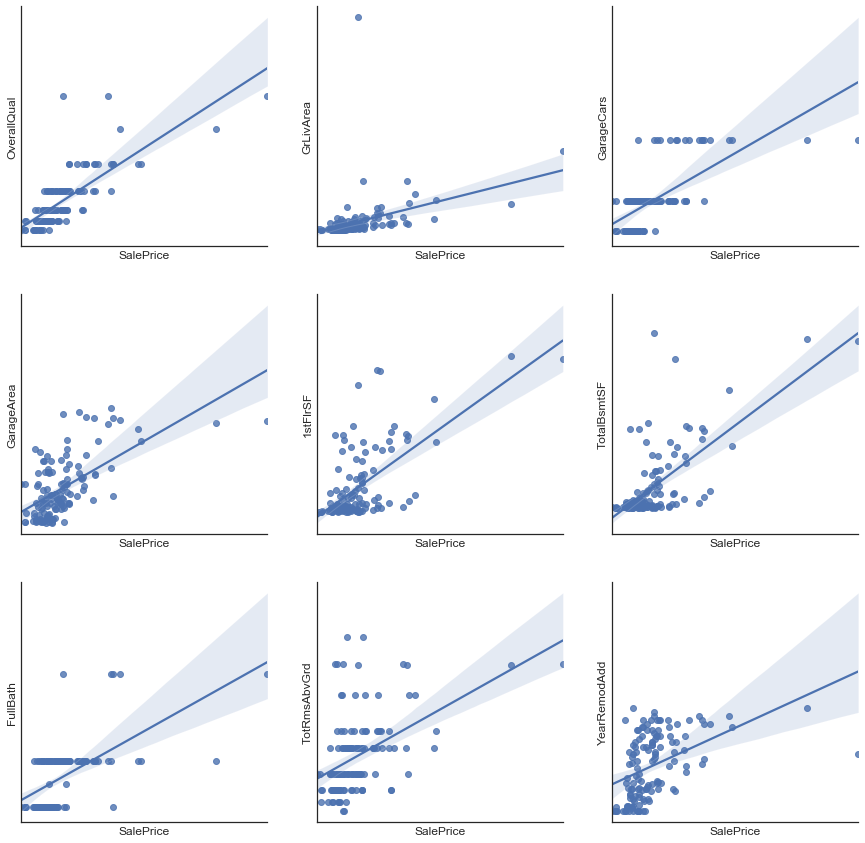


10. Пожалуйста, сделайте больше анализа прогнозов, улучшает ли результаты линейная полиномиальная регрессия?

In [13]:
#Начало вашего кода 
def rmse(y_true, y_pred):
    rmse = (np.mean((y_true - y_pred)**2)) **0.5
    return rmse

rmse_errors = {}
for i in important:
    rmse_errors[i] = rmse(pd_predictions2['SalePrice'], pd_predictions2[i])
    
for key in rmse_errors:
    print(key, ' : ', round(rmse_errors[key], 2))
#Конец вашего кода

OverallQual  :  56406.75
GrLivArea  :  66666.6
GarageCars  :  68040.82
GarageArea  :  72129.03
1stFlrSF  :  71536.5
TotalBsmtSF  :  70434.56
FullBath  :  71969.99
TotRmsAbvGrd  :  79557.04
YearRemodAdd  :  78836.2


In [14]:
rmse_errors = {}
for i in important:
    rmse_errors[i] = rmse(pd_predictions10['SalePrice'], pd_predictions10[i])
    
for key in rmse_errors:
    print(key, ' : ', round(rmse_errors[key], 2))

OverallQual  :  55893.25
GrLivArea  :  109419.04
GarageCars  :  66389.28
GarageArea  :  70178.75
1stFlrSF  :  67334.94
TotalBsmtSF  :  65270.92
FullBath  :  72064.56
TotRmsAbvGrd  :  79004.49
YearRemodAdd  :  78582.7


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>

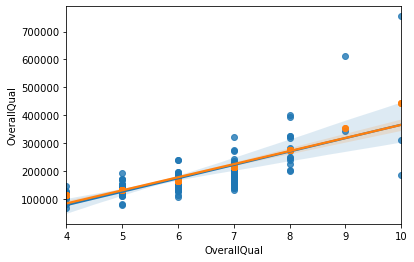

In [15]:
sns.regplot(splitted_data["validation"]['OverallQual'], pd_predictions2['SalePrice'])
sns.regplot(splitted_data["validation"]['OverallQual'], pd_predictions2['OverallQual'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='OverallQual'>

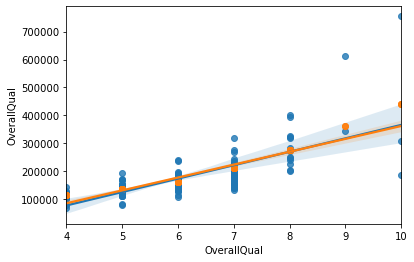

In [16]:
sns.regplot(splitted_data["validation"]['OverallQual'], pd_predictions10['SalePrice'])
sns.regplot(splitted_data["validation"]['OverallQual'], pd_predictions10['OverallQual'])

Я сравнил RMSE 2 моделей, модели линейной полиномиальной регрессии степени 2 и 10. Я не заметил сильного различия. Некоторые RMSE были больше, некоторые меньше. Также я сравнил их лин регрессии и тоже не заметил сильной разницы

### Отличная работа